# Employee Turnover Prediction

In [7]:
# Importing the libraries

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [8]:
# Reading in the data

df = pd.read_csv(r"/Users/shrutidua/Downloads/dataset.csv")


In [9]:
# Looking at the data

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             0.56               2   
15                   0.38             0.54               2   
16                   0.45             0.47               2   
17                   0.78             0.99               4   
18                   0.45             0.51               2   
19                   0.76             0.89               5   
20                   0.11             0.83               6   
21                   0.38             0.55               2   
22                   0.09             0.95               6   
23                   0.46             0.57               2   
24                   0.40             0.53               2   
25                   0.89             0.92               5   
26                   0.82             0.87               4   
27                   0.40             0.49               2   
28                   0.41             0.46               2   
29                   0.38             0.50               2   
30                   0.09             0.62               6   
31                   0.45             0.57               2   
32                   0.40             0.51               2   
33                   0.45             0.55               2   
34                   0.84             0.87               4   
35                   0.10             0.94               6   
36                   0.38             0.46               2   
37                   0.45             0.50               2   
38                   0.11             0.89               6   
39                   0.41             0.54               2   
40                   0.87             0.88               5   
41                   0.45             0.48               2   
42                   0.40             0.46               2   
43                   0.10             0.80               7   
44                   0.09             0.89               6   
45                   0.84             0.74               3   
46                   0.40             0.55               2   
47                   0.57             0.70               3   
48                   0.40             0.54               2   
49                   0.43             0.47               2   
50                   0.13             0.78               6   
51                   0.44             0.55               2   
52                   0.38             0.55               2   
53                   0.39             0.54               2   
54                   0.10             0.92               7   
55                   0.37             0.46               2   
56                   0.11             0.94               7   
57                   0.10             0.81               6   
58                   0.38             0.54               2   
59                   0.85             1.00               4   
60                   0.85             0.91               5   
61                   0.11             0.93               7   
62                   0.10             0.95               6   
63                   0.36             0

In [10]:
# Looking at the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
# Shape of dataset

df.shape

(14999, 10)

# Data Cleaning

In [12]:
# Looking for missing values

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [13]:
# Checking for duplicates

df.duplicated(keep="first").sum()

3008

In [14]:
# Dropping the duplicate rows

df.drop_duplicates(inplace=True)

In [15]:
df.shape

(11991, 10)

In [16]:
df = df.rename(columns={'average_montly_hours': 'average_monthly_hours', "sales": "position", 
                        "promotion_last_5years":"promotion_last_5_years", "time_spend_company":"years_spent_at_company",
                       "number_project":"number_of_projects", "Work_accident":"work_accidents"})
df.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_spent_at_company  work_accidents  left  \
0                    157                       3               0     1   
1                    262                       6               0     1   
2                    272                       4               0     1   
3                    223                       5               0     1   
4                    159                       3               0     1   

   promotion_last_5_years position  salary  
0                       0    sales     low  
1                       0    sales  medium  
2                       0    sales  medium  
3                       0    sales     low  
4                       0    sales     low

# Exploratory Data Analysis

In [17]:
# Visualizing our target variable

# Satisfaction level

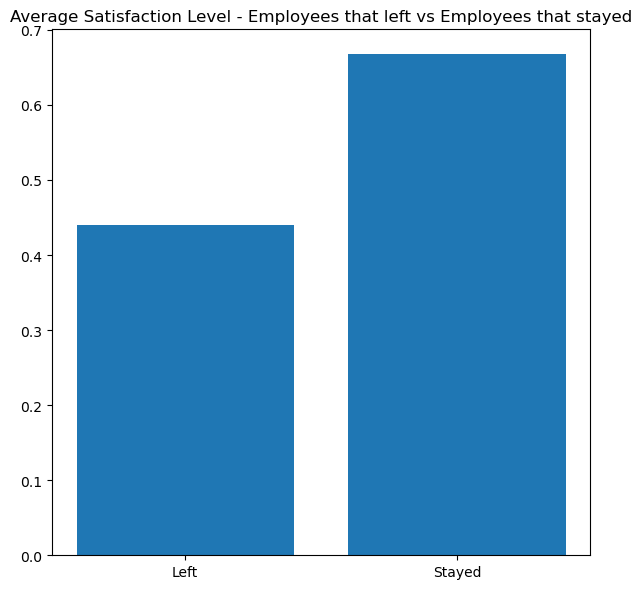

In [18]:
# Comparing average satisfaction level of employees who left vs who didn't

left = df[df["left"] == 1]
stayed = df[df["left"] == 0]

satisfaction_left = left["satisfaction_level"].mean()
satisfaction_stayed = stayed["satisfaction_level"].mean()

categories = ['Left', 'Stayed']
satisfaction_hours = [satisfaction_left, satisfaction_stayed]

plt.figure(figsize=(6, 6))
plt.bar(categories, satisfaction_hours)
plt.title("Average Satisfaction Level - Employees that left vs Employees that stayed")
plt.tight_layout()
plt.show()

# Average monthly hours

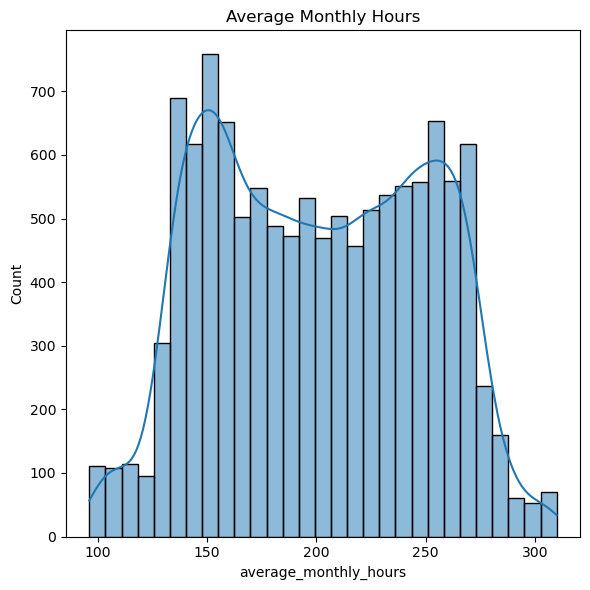

In [19]:
# Looking at the average monthly hours of all employees

bins = bins = len(df["average_monthly_hours"].unique())

plt.figure(figsize=(6, 6))
sns.histplot(data = df, x = df["average_monthly_hours"], kde = True)
plt.title("Average Monthly Hours")
plt.tight_layout()
plt.show()

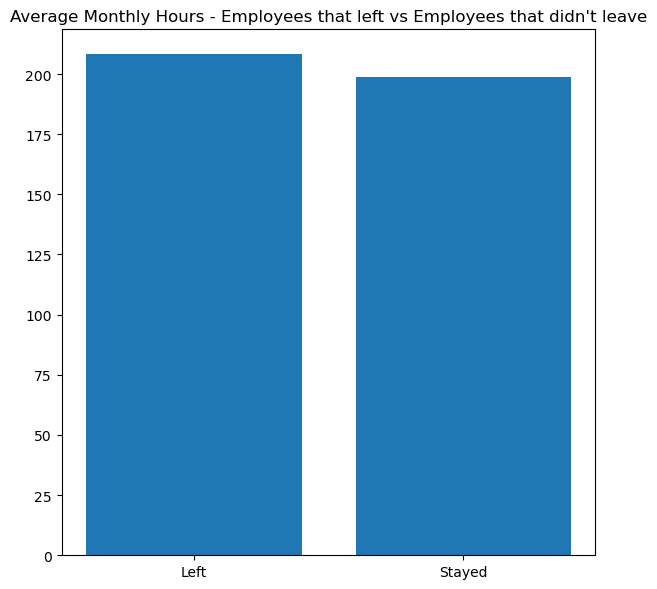

In [20]:
# Comparing average monthly hours of employees who left vs who didn't

average_hours_left = left["average_monthly_hours"].mean()
average_hours_stayed = stayed["average_monthly_hours"].mean()

categories = ['Left', 'Stayed']
average_hours = [average_hours_left, average_hours_stayed]

plt.figure(figsize=(6, 6))
plt.bar(categories, average_hours)
plt.title("Average Monthly Hours - Employees that left vs Employees that didn't leave")
plt.tight_layout()
plt.show()

# Number of projects

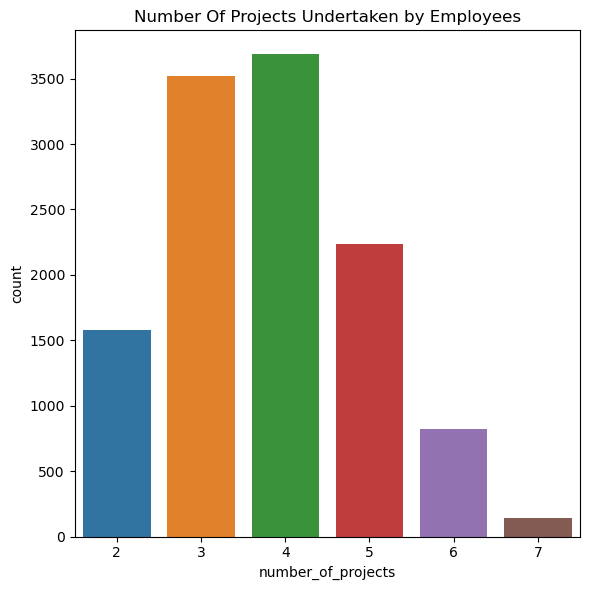

In [21]:
# Number Of Projects Undertaken by all Employees

plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="number_of_projects")
plt.title("Number Of Projects Undertaken by Employees")
plt.tight_layout()
plt.show()

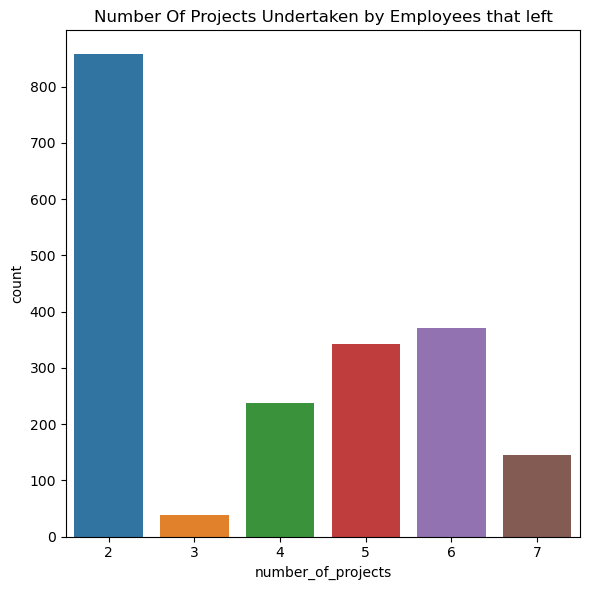

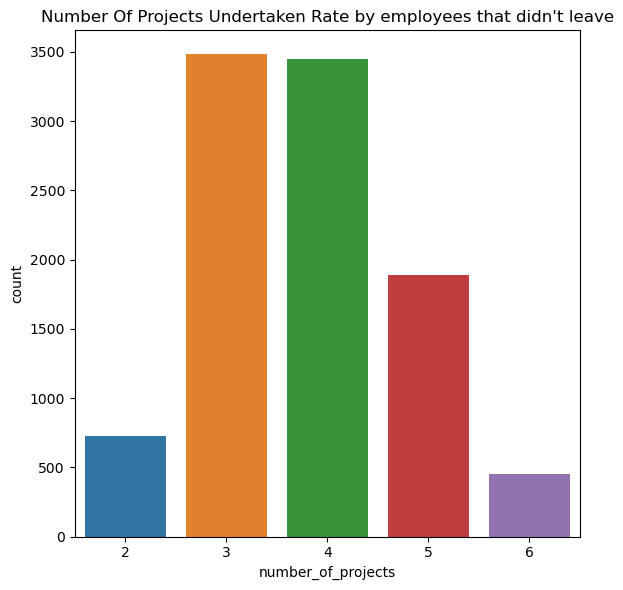

In [22]:
# Number Of Projects Undertaken by Employees divided by whether or not they left the company

plt.figure(figsize=(6, 6))
sns.countplot(data=left, x="number_of_projects")
plt.title("Number Of Projects Undertaken by Employees that left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(data=stayed, x="number_of_projects")
plt.title("Number Of Projects Undertaken Rate by employees that didn't leave")
plt.tight_layout()
plt.show()

# Promotion in last 5 years

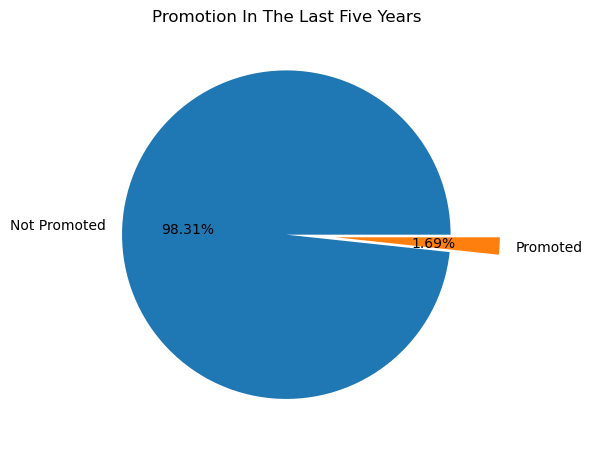

In [23]:
# Promotions given to employees in the last five years

labels = df["promotion_last_5_years"].value_counts().index.tolist()
labels = ["Promoted" if i == 1 else "Not Promoted" for i in labels]

plt.figure(figsize=(6, 6))
plt.pie(x = df["promotion_last_5_years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years")
plt.tight_layout()
plt.show()

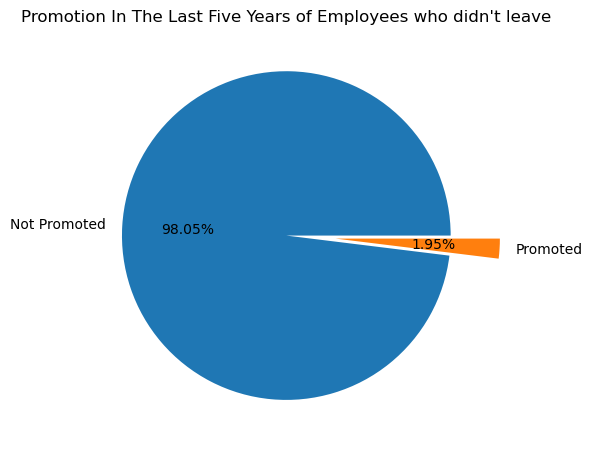

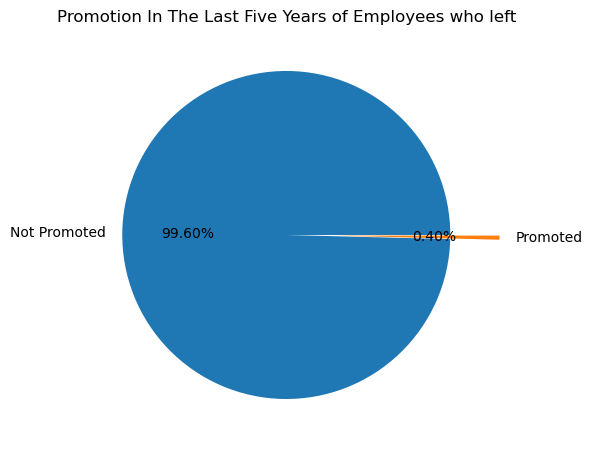

In [24]:
# Comparing promotions between those who stayed and left

# Those who stayed
plt.figure(figsize=(6, 6))
plt.pie(x = stayed["promotion_last_5_years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years of Employees who didn't leave")
plt.tight_layout()
plt.show()

# Those who left
plt.figure(figsize=(6, 6))
plt.pie(x = left["promotion_last_5_years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years of Employees who left")
plt.tight_layout()
plt.show()

# Salary level

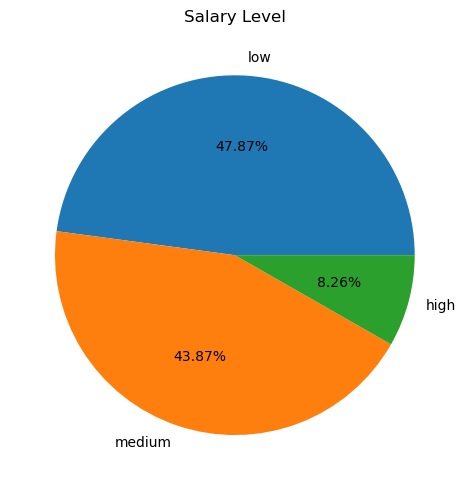

In [25]:
# Salary distribution of employees

labels = df["salary"].value_counts().index.tolist()

plt.figure(figsize=(5, 5))
plt.pie(x = df["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Level")
plt.tight_layout()
plt.show()

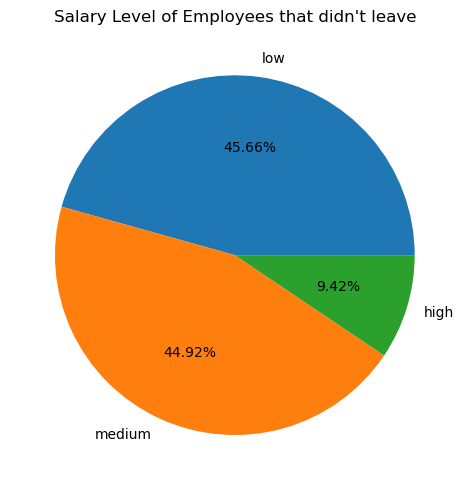

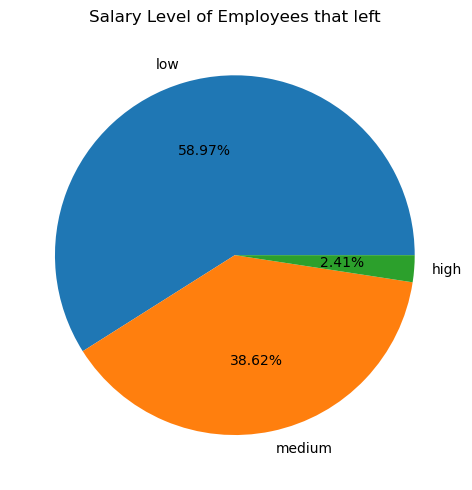

In [26]:
# Salary distribution of employees divided by the employees who left and who didn't

labels = df["salary"].value_counts().index.tolist()

# Those who stayed
plt.figure(figsize=(5, 5))
plt.pie(x = stayed["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Level of Employees that didn't leave")
plt.tight_layout()
plt.show()

# Those who left
plt.figure(figsize=(5, 5))
plt.pie(x = left["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Level of Employees that left")
plt.tight_layout()
plt.show()

# Employee Position

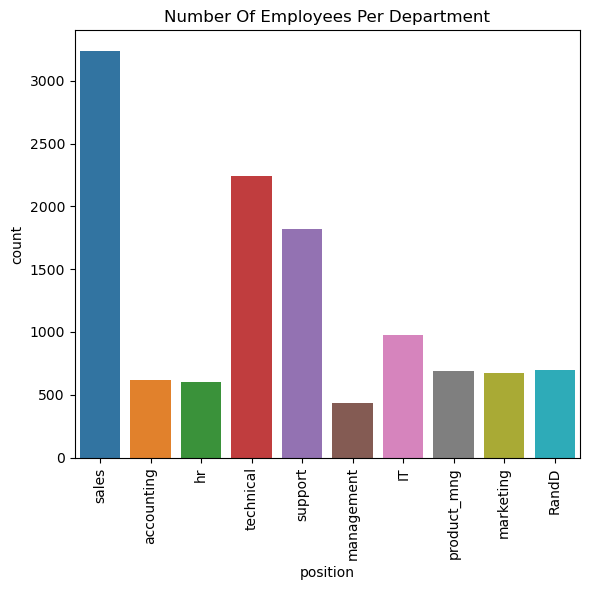

In [27]:
# Number of employees in each department

plt.figure(figsize=(6, 6))
sns.countplot(x = "position", data=df)
plt.title("Number Of Employees Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

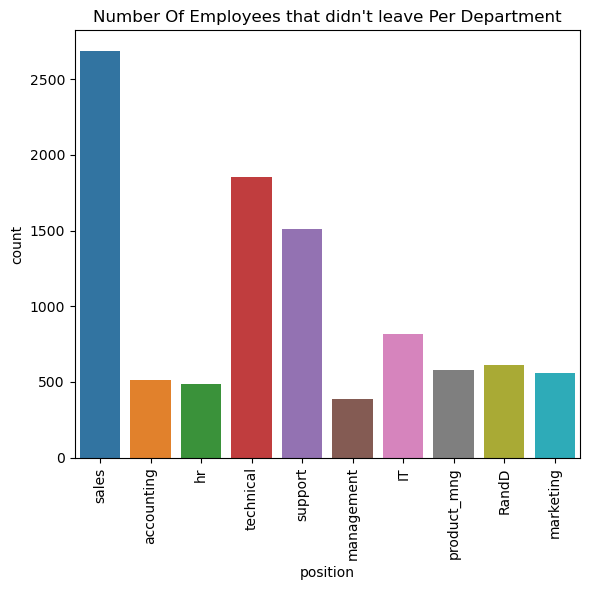

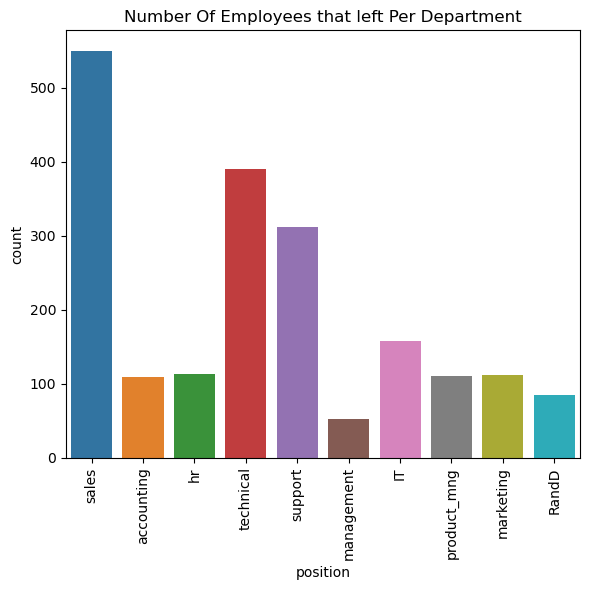

In [28]:
# Looking at the department division of those who left and those who didn't

# Those who stayed
plt.figure(figsize=(6, 6))
sns.countplot(x = "position", data=stayed)
plt.title("Number Of Employees that didn't leave Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Those who left
plt.figure(figsize=(6, 6))
sns.countplot(x = "position", data=left)
plt.title("Number Of Employees that left Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Data pre-processing

In [29]:
# Categorial encoding

columns = ["position", "salary"]
new_columns = pd.get_dummies(df[columns], prefix="type")

In [30]:
new_columns.head()

type_IT  type_RandD  type_accounting  type_hr  type_management  \
0        0           0                0        0                0   
1        0           0                0        0                0   
2        0           0                0        0                0   
3        0           0                0        0                0   
4        0           0                0        0                0   

   type_marketing  type_product_mng  type_sales  type_support  type_technical  \
0               0                 0           1             0               0   
1               0                 0           1             0               0   
2               0                 0           1             0               0   
3               0                 0           1             0               0   
4               0                 0           1             0               0   

   type_high  type_low  type_medium  
0          0         1            0  
1          0         0            1  
2          0         0            1  
3          0         1            0  
4          0         1            0

In [31]:
df = df.join(new_columns)
df.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_spent_at_company  work_accidents  left  \
0                    157                       3               0     1   
1                    262                       6               0     1   
2                    272                       4               0     1   
3                    223                       5               0     1   
4                    159                       3               0     1   

   promotion_last_5_years position  salary  type_IT  type_RandD  \
0                       0    sales     low        0           0   
1                       0    sales  medium        0           0   
2                       0    sales  medium        0           0   
3                       0    sales     low        0           0   
4                       0    sales     low        0           0   

   type_accounting  type_hr  type_management  type_marketing  \
0                0        0                0               0   
1                0        0                0               0   
2                0        0                0               0   
3                0        0                0               0   
4                0        0                0               0   

   type_product_mng  type_sales  type_support  type_technical  type_high  \
0                 0           1             0               0          0   
1                 0           1             0               0          0   
2                 0           1             0               0          0   
3                 0           1             0               0          0   
4                 0           1             0               0          0   

   type_low  type_medium  
0         1            0  
1         0            1  
2         0            1  
3         1            0  
4         1            0

In [32]:
# Dropping the columns we have encoded

df.drop(["position", "salary"], inplace=True, axis= 1)
df.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_spent_at_company  work_accidents  left  \
0                    157                       3               0     1   
1                    262                       6               0     1   
2                    272                       4               0     1   
3                    223                       5               0     1   
4                    159                       3               0     1   

   promotion_last_5_years  type_IT  type_RandD  type_accounting  type_hr  \
0                       0        0           0                0        0   
1                       0        0           0                0        0   
2                       0        0           0                0        0   
3                       0        0           0                0        0   
4                       0        0           0                0        0   

   type_management  type_marketing  type_product_mng  type_sales  \
0                0               0                 0           1   
1                0               0                 0           1   
2                0               0                 0           1   
3                0               0                 0           1   
4                0               0                 0           1   

   type_support  type_technical  type_high  type_low  type_medium  
0             0               0          0         1            0  
1             0               0          0         0            1  
2             0               0          0         0            1  
3             0               0          0         1            0  
4             0               0          0         1            0

# Seperating data into predictors and target values

In [33]:
X = df.drop("left", axis=1)
y = df["left"]

In [34]:
X.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_spent_at_company  work_accidents  \
0                    157                       3               0   
1                    262                       6               0   
2                    272                       4               0   
3                    223                       5               0   
4                    159                       3               0   

   promotion_last_5_years  type_IT  type_RandD  type_accounting  type_hr  \
0                       0        0           0                0        0   
1                       0        0           0                0        0   
2                       0        0           0                0        0   
3                       0        0           0                0        0   
4                       0        0           0                0        0   

   type_management  type_marketing  type_product_mng  type_sales  \
0                0               0                 0           1   
1                0               0                 0           1   
2                0               0                 0           1   
3                0               0                 0           1   
4                0               0                 0           1   

   type_support  type_technical  type_high  type_low  type_medium  
0             0               0          0         1            0  
1             0               0          0         0            1  
2             0               0          0         0            1  
3             0               0          0         1            0  
4             0               0          0         1            0

# Splitting data into training and test data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [36]:
X_train.shape

(9592, 20)

In [37]:
X_test.shape

(2399, 20)

# Logistic Regression

# Training the model

In [38]:
# Creating the model
logistic = LogisticRegression(max_iter=2000)

# Training the model on the training data
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [39]:
# Predict the target values of the test data using the model

y_pred_lr = logistic.predict(X_test)

# Evaluation of the model

In [41]:
# Accuracy, precision, recall, and f1 score

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8336807002917882
Precision: 0.4695121951219512
Recall: 0.19794344473007713
F1 score: 0.27848101265822783


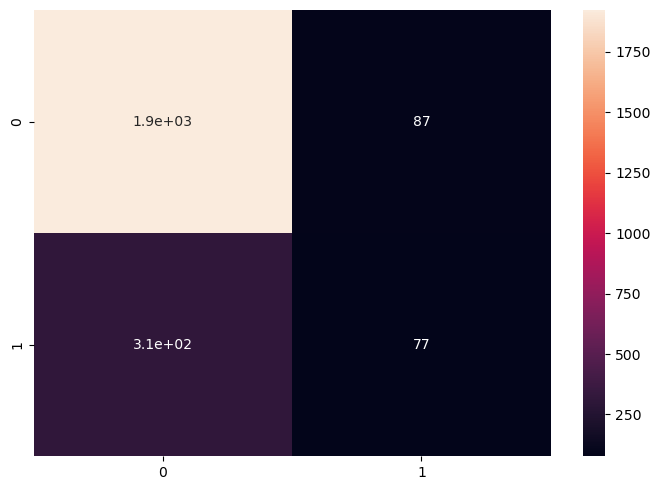

In [47]:
# Confusion matrix using heatmap

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

In [48]:
# As we can see, the Logistic Regression model is giving a large number of false positives. 
# Therefore, applying more models to get the best outcome is important.

# Random forrest 

# Training the model

In [49]:
# Creating the model
randf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Training the model on the training data
randf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [50]:
# Predict the target values of the test data using the model

y_pred_rf = randf.predict(X_test)

In [51]:
# Classification report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2010
           1       0.47      0.20      0.28       389

    accuracy                           0.83      2399
   macro avg       0.66      0.58      0.59      2399
weighted avg       0.80      0.83      0.80      2399



# Evaluation of the model

In [52]:
# Accuracy, precision, recall, and f1 score

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9829095456440183
Precision: 0.9915254237288136
Recall: 0.9023136246786633
F1 score: 0.9448183041722745


In [53]:
# Classification report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2010
           1       0.99      0.90      0.94       389

    accuracy                           0.98      2399
   macro avg       0.99      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399



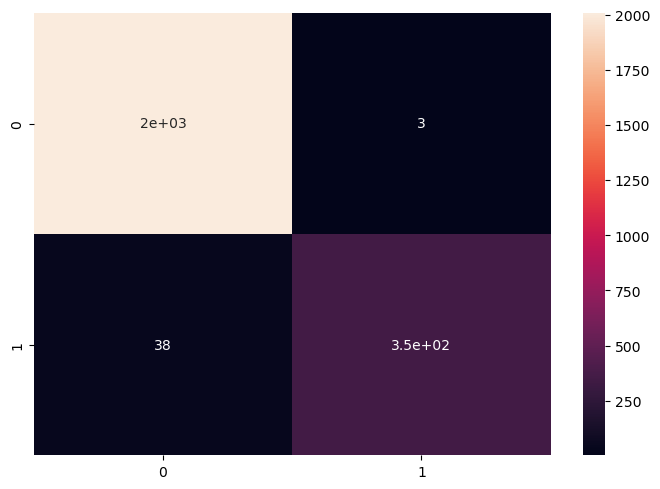

In [54]:
# Confusion matrix using heatmap

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

# Xgboost

In [55]:
# Creating the model
xgb = XGBClassifier()

# Training the model on the training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
# Predict the target values of the test data using the model

y_pred_xg = xgb.predict(X_test)

# Evaluation of the model

In [57]:
# Accuracy, precision, recall, and f1 score

accuracy = accuracy_score(y_test, y_pred_xg)
precision = precision_score(y_test, y_pred_xg)
recall = recall_score(y_test, y_pred_xg)
f1 = f1_score(y_test, y_pred_xg)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9837432263443101
Precision: 0.972972972972973
Recall: 0.9254498714652957
F1 score: 0.9486166007905139


In [58]:
# Classification report

print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2010
           1       0.97      0.93      0.95       389

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



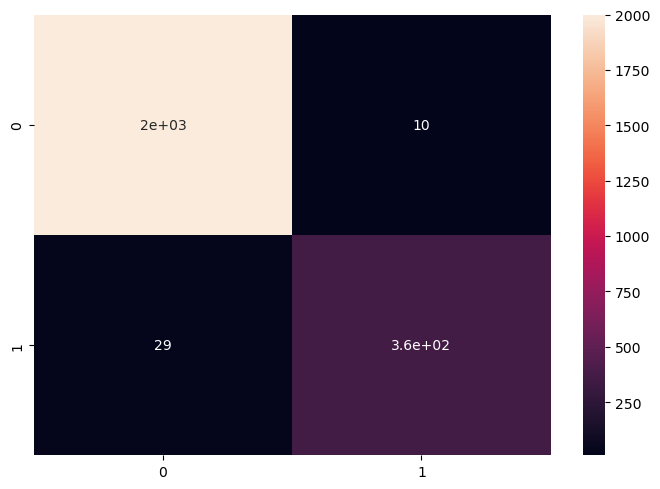

In [59]:
# Confusion matrix using heatmap

cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()